Nome: Thais Lima de Sousa nUSP 8941220

In [49]:
from vpi.io import *
import numpy as np

# Exercício 7 - P1

## Aplicação de operações aritméticas

### Índice de diferença de vegetação
<p>A obtenção de imagens de Índice de Diferença de Vegetação é feito através da divisão entre bandas de uma imagem multiespectral, usando uma banda com alta sensibilidade (banda 4) à resposta de vegetação e uma de baixa sensibilidade (banda 3). O Índice normalizado, obtido por <center><i>(TM_4 - TM_3) / (TM_4 + TM_3)</i></center></p>aumenta o contraste
espectral entre a vegetação e o solo, mostra os efeitos de iluminação, declividade da superfície e geometria
de "visada" parcialmente compensados pelo índice.</p>

<line><p>Nosso objetivo é aplicar essa operação em imagens tiradas por satélites e processá-las para que essas características sejam facilmente identificadas.</p>

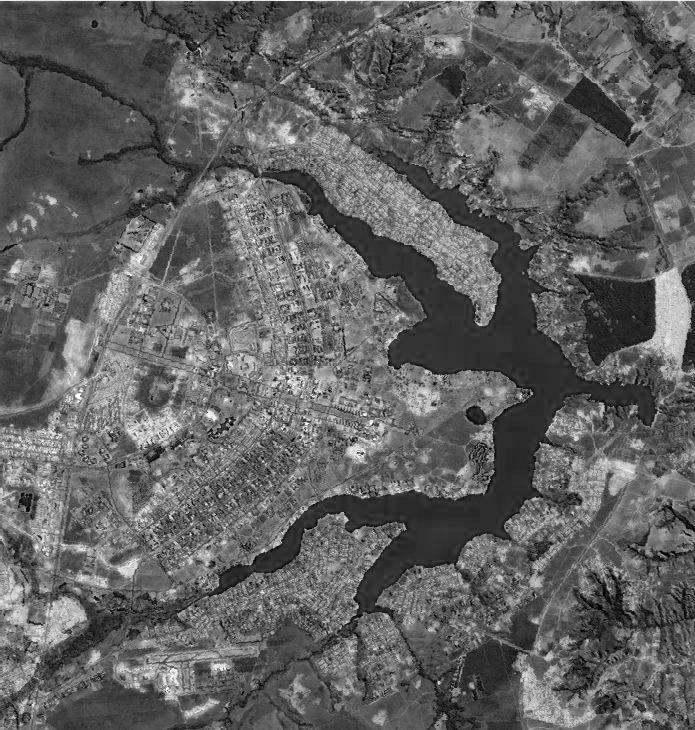

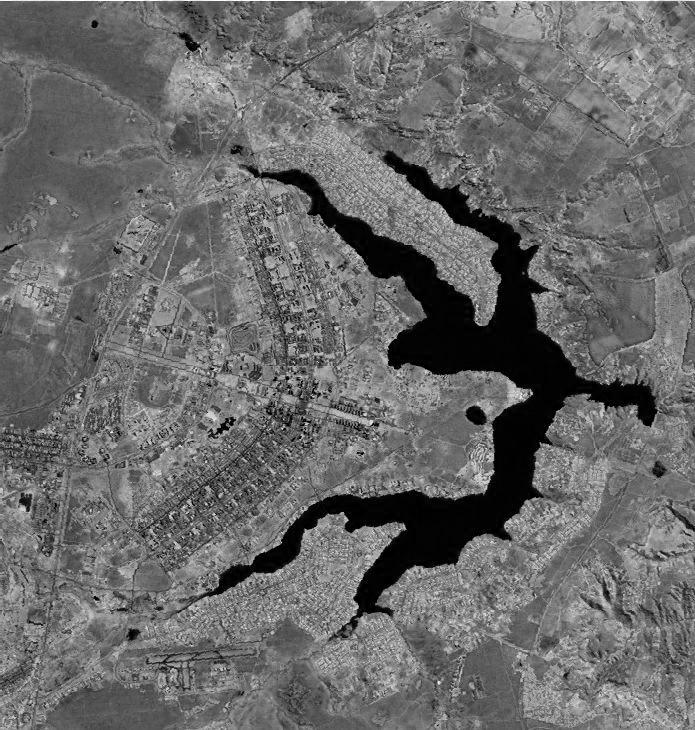

In [50]:
# output image: (TM_4 - TM_3) / (TM_4 + TM_3)

tm3 = read_image('TM_3.jpg').astype(int)
tm4 = read_image('TM_4.jpg').astype(int)

display_image(tm3)
display_image(tm4)

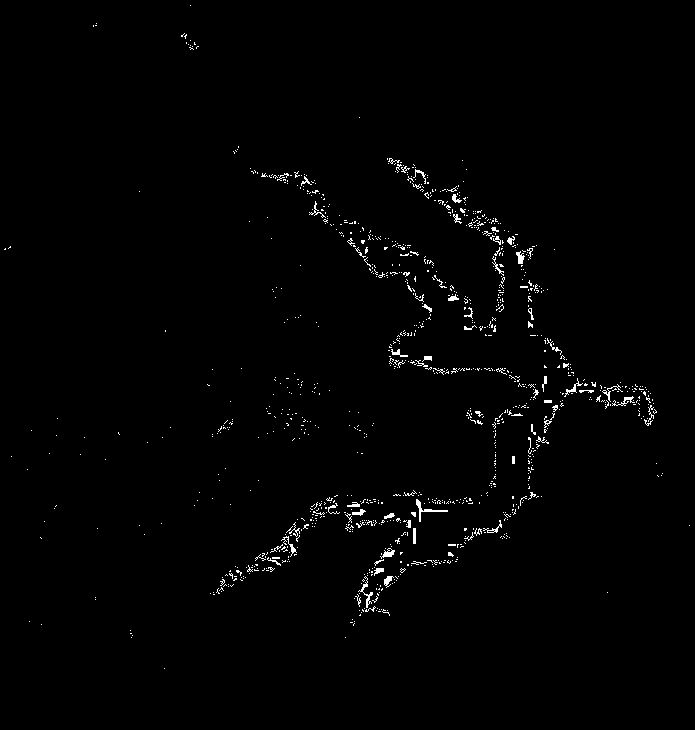

min value=  -1.0 
max value=  1.0


In [51]:
NVDI_sub = (tm4 - tm3)
NVDI_sum = (tm4 + tm3)

NVDI = np.zeros(NVDI_sum.shape)

# Calculate NVDI
for i in range(g.shape[0]):
    for j in range(g.shape[1]):
        if g_sum[i, j] == 0:
            NVDI[i, j] = 1
        else:
            NVDI[i, j] = NVDI_sub[i, j] / NVDI_sum[i, j]
            
display_image(NVDI)
print('min value= ', NVDI.min(), '\nmax value= ', NVDI.max())


<p>A imagem produzida possui overflows e underflows, seus níveis de cinza estão entre -1 e 1.É necessário realçar a imagem para melhorar seu brilho e contraste, de forma a facilitar a identificação das áreas de vegetação.</p>

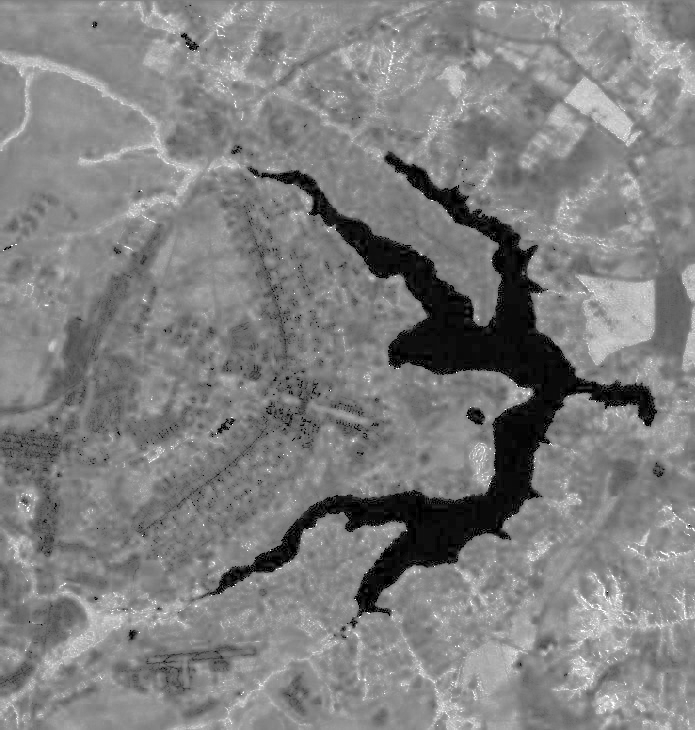

In [52]:
# Fórmula de normalização vista em aula

zmax = NVDI.max()
zmin = NVDI.min()
new_min = 0
new_max = 255

NVDI_1 = ((new_max - new_min) / (zmax - zmin) * (NVDI - zmin) + new_min).astype(int)

display_image(NVDI_1)
        

a=  127.5
b=  127.5


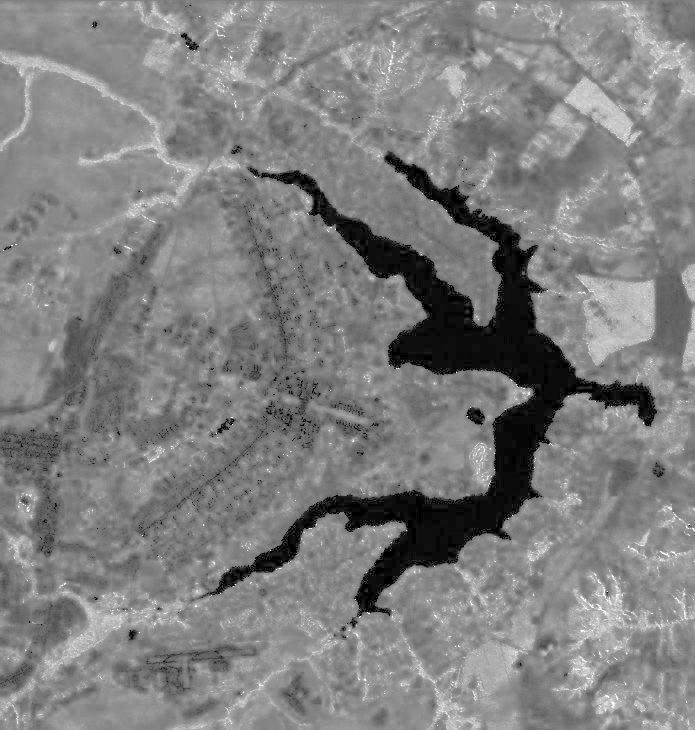

In [53]:
# gain and offset

a = (2**8 - 1) / (zmax - zmin)
b = - a * zmin

print('a= ', a)
print('b= ', b)

S = a * NVDI + b

display_image(S)

<p>Na imagem resultante, as áreas escuras representam índice de vegetação baixo enquanto que as áreas claras representam índice de vegetação alto. Quanto mais branco maior a densidade da vegetação no local. Por consequência as regiões com valores mais escuros na imagem representam ausencia de vegetação (na imagem utilizada, a área escura corresponde a um rio).</p>

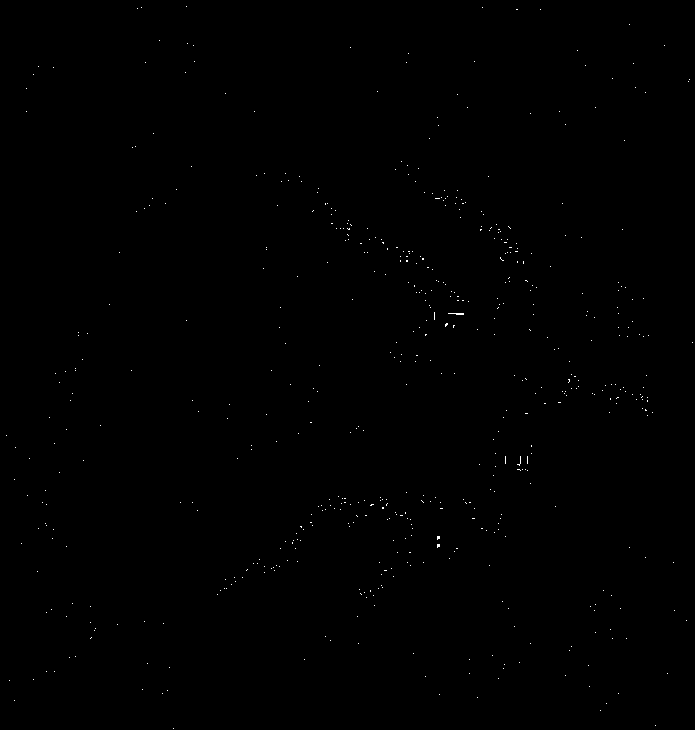

In [54]:
display_image(NVDI_1 - S)

<p>Observe que as duas formas de realce produzem praticamente o mesmo resultado.</p>

<p>O realce linear redistribui os os tons de cinza da imagem de acordo com a função de transferência definida pelos parâmetros <i>a</i> (ganho) e <i>b</i> (offset) para valores pré-estabelecidos. O ganho corresponde ao coeficiente angular da transformação linear, portanto é responsável por melhorar o contraste da imagem. Já o offset, que é o coeficiente linear, aumenta ou diminui a intensidade do nível de cinza, portanto modifica o brilho da imagem.</p>


### Conclusão
Operações aritméticas são muito importantes para análise de diferenças entre imagens, a adição normaliza o brilho entre elas e remove o ruído e a subtração detecta suas diferenças. Porém, é necessário ajustar os valores que fogem do intervalo de decodificação de tons de cinza. Além disso, as técnicas de realce de histograma são grande aliadas para facilitar a visualização das características destacadas pelas operações aritméticas.